##Induction Machine Design of the 270 kW Tesla Model S Motor
###Introduction

In this study, the 270 kW induction machine of Tesla Model S car is designed and simulated. First the design specifications are provided and then the design procedure is given. The simulation results found from single layer implementation are provided for two different winding configurations (double layer and single layer). The results provided seems to exhibit satisfactory performance. 

###Design Specifications
From [1], the rated speed of the motor can be obtained around 6000 rpm. In the figure below, the torque speed characteristics of the machine is provided from [1].
   





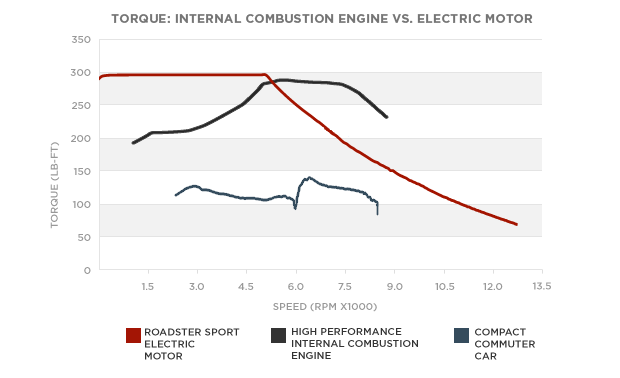

In [60]:
from IPython.display import Image
Image(filename='torque.png')

Fig. 1 Torque speed characteristics of the Tesla induction motor

$$ Design    parameters$$
$$ P=270 kW $$
$$ T=440 Nm$$

hence $$ n=5859 rpm$$ which can be deduced from the torque speed characteristics provided above.

Moreover, from [8], the battery is understood to be composed of 96 series 3.2 V cells making 400 V dc bus voltage. With zero sequence voltage injection techniques, $ 560 V_{peak} $ can be applied to a three-phase induction machine with isolated star point. 

$$ V_{ll}=560 V$$

Hence $$V_{ln}=323 V$$

The machine is specified to be a 4 pole 3 phase induction machine.
Moreover, from the previous link and the open structure of the motor provided in the following link slot number can be inferred as 48  [3].

Interestingly, the slot number can be counted from the figure provided in [1]. Most probably the figure belongs to the actual motor dimensions.

In [3], the stator slot number and rotor bar number are disclosed explicitly as 48 and 68 respectively. The validity of these numbers are verified from design lecture notes.

Considering the slip and the rated spped of the machine specified above, the maximum rotating magnetic field speed is 6000 rpm which makes 200 Hz of inverter output voltage fundamental frequency at maximum output voltage.

$$ f=200 Hz $$

target efficiency=0.93
cos phi=0.85



In [61]:
eff=0.93
pf=0.85

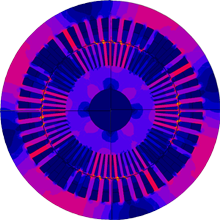

In [62]:
from IPython.display import Image
Image(filename='magflux.png')



Fig. 2 Probably the actual designed induction machine axial view in [1]

###Design of the IM

####Main Dimensions

The tangential stress for the machine is taken as  (from lecture book Table 6.3)
$$\sigma_{tan}=20000$$

It is known that the tangential stress multiplied by the surface of the rotor and the diameter gives the desired torque

$$T=\sigma_{tan}(2\pi.r_rl_r)r_r$$

Here $r_r$ refers to the rotor radius
$l_r$ refers to the rotor axial length

Note that the rotor diameter is  $D_r=2r_r $

In [63]:
import math
from __future__ import division
p=270000 #270kW
pp=2 #pole pairs
sigmatan=20000 #selected tangential maxwell stress
T=440  #required torque
pi=math.pi  #pi number
loverDr=1.6  #rotor effective legth over rotor diameter aspect ratio
Dr=math.pow(2*T/(sigmatan*pi*loverDr),1.0/3.0)  #rotor diameter
l=loverDr*Dr #rotor length
print  Dr
print l

0.206091908199
0.329747053118


The airgap legth can be obtained from the approximation for heavy duty asynchronous machines in the book as

In [64]:
lg=1.6e-3*(0.18+0.006*math.pow(p,0.4))
print lg

0.00171629112857


The inner stator diameter $D_{is}$ is

In [65]:
Dis=Dr+2*lg #inner stator diameter
print Dis

0.209524490456


From Table 15.2 of [5] we have $D_{is}$/$D_{out}$=0.61, hence we obtain $D_{out}$ as follows

In [66]:
Dout=Dis/0.61 #outer stator diameter
print Dout

0.343482771239


####Stator Slots and Windings

The stator slot number is $$ Q_s=2*pp*q*m $$ m is phase number, q is number of slot per pole per phase, selecting m=4 we have 

$$ Q_s=48 $$
which is the actual stator slot number in the machine as stated in the aforementioned pharagraphs.

The slot pitch can be obtained as $\tau_s=\pi*D_{is}/Q_s$

In [67]:
Qs=48   #slot number
tauslot=pi*Dis/Qs   #slot pitch
print tauslot

0.0137133458326


which is in the mechanically acceptable range.

After determining the slot number and main dimensions, the winding configuration of the stator is determined. It is general sense to have 5/6 pitch chorded windings to reduce 5th and 7 th harmonics. [7].

In [68]:
m=Qs/3/4
alpha=2*pi*pp/Qs  #electrical angle between slots
kd=math.sin(m*alpha/2)/m/math.sin(alpha/2)
kp=math.sin(pi/2*5/6)
kw=kp*kd
print kw


0.925030648888


In [69]:
Bg=0.7 #air gap flux density within the specified limits
alphai=0.74 #flux  derating factor
Ke=0.97
Fpp=alphai*Bg*pi*Dis*l/2/pp  ##derated flux per pole
Vln=323  #previously found line to neutral phase voltage
f=200 #200 hz applied frequency
W=Vln/(4*math.pi*f*Fpp*kw)  #number of turns per phase
print Fpp
print W

0.0281083503014
4.94277888727


Number of turns per slot can be obtained as

In [70]:
q=48/3/2/pp
ns=W/(pp*q)
print ns #number of conductor per slot


0.617847360908


Hence the number of coils per slot is selected as 2. (due to double layer structure)

In [71]:
ns=1
Wnew=pp*q*ns
print Wnew

8.0


the new airgap flux density can be obtained as.

In [72]:
Bg=Bg*W/Wnew
print Bg

0.432493152636


In [73]:
i1=p/3/Vln/eff/pf
print i1, 'current at full load 6000rpm'

352.482948637 current at full load 6000rpm


From 15.17 the current density $ J_{cos} $ for the conductors are selected as 4.5 A/mm2

Then the magnetic wire cross section area is obtained as 

In [74]:
jcos=4.5
Aco=i1/jcos
print Aco  #the required area of the conductor of one phase

78.3295441416


Litz wire scould be more appropriate as the machine is intended to be driven by an inverter. However, in the project, the conductors are selected from standard AWG conductors. These conductors are used as parallel conductors. The number of parallel conductors should be kept high in order to reduce skin and proximity effects.


In [75]:
ap=48   #number of parallel conductors
dco=math.sqrt(4*Aco/pi/ap)
print dco, 'in mm'  #the diameter of the conductor to be utilized

1.44144222571 in mm


Hence AWG 15 wire is selected.

The flux density in the stator tooth should not be too much. In [5] it is advised to be in the range 1.5 -1.65 T. In the design it is taken Bts = 1.55 T.

In [76]:
kfe=0.96
Bts=1.55
toothw=Bg*tauslot/Bts   #tooth width
print toothw

0.00382640527246


In [77]:
ff=0.4  #fill factor for high power mc in the book
rsa=2*dco*dco*math.pi*ap*ns/4/ff   #reqired slot area in mm2
print rsa

391.647720708


Note that the required area is given in terms of mm2. In the figure below, the selected slot shape is illustrated. From the geometry, the slot area can be approximated as $$RSA=Sds[(2*\pi(D_{is}/2+Sds/2)/Q_s)-Ws]$$

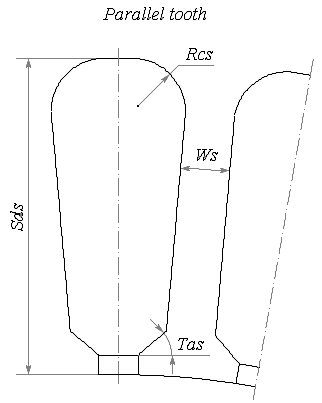

In [78]:
from IPython.display import Image
Image(filename='paralleltooth.png')

Fig. 3 Stator tooth structure

solving the above equation we get

In [79]:
from sympy import *
init_printing(use_latex=True)
sds=symbols('sds')
solve((pi/Qs)*sds**2+(pi/Qs*Dis-toothw)*sds-0.000001*rsa)

Hence the slot depth is 32 mm. From the figure below, Ows is selected as 4.5 mm which is lower than 8 times the airgap length.  Ods is selected as 2.5 mm. as we increase Ods too much the leakage inductances will increase, as we make it too small, the mechanical construction will be diffucult and the tooth will be vulnarable to small crashes.

In [80]:
ods=0.0025
ows=0.0045

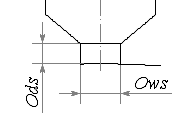

In [81]:
from IPython.display import Image
Image(filename='statortooth.png')

Fig. 4 Stator slot structure

Now we proceed in calculating the teeth saturation factor 1+Kst where $Kst=(Fmts+Fmtr)/Fmg$ the ratio of the slot magnetic voltage drop to the airgap magnetic voltage drop. The airgap magnetic voltage drop can be calculated as

In [82]:
nuzero=4*math.pi*1e-7
Fmg=1.2*Bg*lg/nuzero
print Fmg ,'ampere turns'

708.829160445 ampere turns


and $Fmts$ should be calculated by making use of the lamination sheet characteristics provided in the book, the stator tooth flux density was intended to be 1.55 T. From table 15.4 corresponding magnetic field intensity can be read as 1760 A/m.

In [83]:
sds=0.034
hstooth=1760
fmts=(sds+ods)*hstooth
print fmts

64.24


In [84]:
kst=0.4
fmtr=kst*Fmg-fmts
print fmtr

219.291664178


In [85]:
fmtr=fmts

The magnetic voltage drop in the rotor tooth $Fmtr$ is greater than the stator tooth when we want to tooth saturation factor to be met. However, the rotor mtoot magnetic voltage drop can be made equal to that of stator so that the effective airgap length is reduced. As we inserted slots into the stator, the utilization of the backcore of the stator is reduced. Hence the flux density in the back core should be checked and redesigned if necessary.

In [86]:
hback=Dout/2-sds
print hback

0.13774138562


In [87]:
Fpp=alphai*Bg*math.pi*Dis*l/2/pp  ##new derated flux per pole
Bs=Fpp/hback/l/2
print Bs

0.191179440853


The magnetic loading can be calculated as

In [88]:
magload=Fpp/math.pi/Dis/l*(2*pp) 
print magload

0.32004493295


and ht electrical loading can be obtained as

In [89]:
electload=m*2*Wnew*i1/math.pi/Dis/l 
print electload

103932.768981


###Rotor slots

Rotor slot number Qr is 68. Based on thes and the stator line current, required area for the rotor slots can be found as:

In [90]:
Qr=68.0 # rotor slot number
ir=2.0*3*Wnew*kw*i1/Qr # rotor bar current ki parameter is taken as 1 so it is not written
jr=4 # current density is taken smaller than stator current density as the cooling of rotor is more difficult
rears=ir/jr # required area for rotor slot
print rears,'in mm2'

57.5395642411 in mm2


The rotor slot pitch can be  obtained as:

In [91]:
tauslotr=math.pi*(Dis-2*lg)/Qr  #slot pitch
print tauslotr

0.00952142389355


The rotor tooth flux density is selected to be 1.6 T. Hence we can find rotor tooth width.

In [92]:
wr=tauslotr*Bg/1.5/0.96
print wr    #rotor tooth width

0.00285968794257


The selected rotor slot geometry is depicted in the following figure.

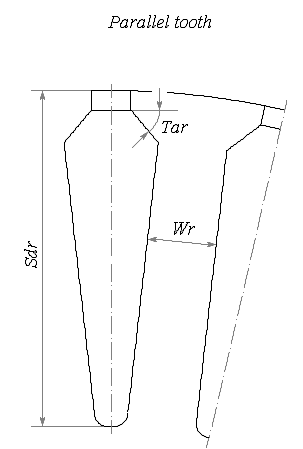

In [93]:
from IPython.display import Image
Image(filename='rotorslot.png')

Fig. 5 Rotor tooth structure

Here the same approach for finding stator slot depth is utilized.

In [94]:
from sympy import *
init_printing(use_latex=True)
sdr=symbols('sdr')
solve((-pi/Qr)*sdr**2+(pi/Qr*Dis-wr)*sdr-0.000001*rears)


Obviously 2.5 cm slot depth is the logical one. Tar is selected as 60 degrees.
The parameters shown below Owr and Odr are selected as 3.5 mm and odr 2.5 mm respectively.

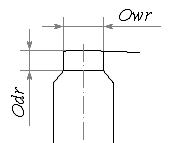

In [95]:
from IPython.display import Image
Image(filename='rotortooth.png')

Fig. 6 Rotor slot structure illustrating Owr and Odr parameters.

The rotor slot magnetic voltage drop then can be calculated as 

In [96]:
sdr=0.025 #in m
Fmtr=sdr*1340
print Fmtr

33.5


calculated fmtr is less than previously estimated. So there is no need to increase the rotor tooth width. The rotor back core requirement should be also checked. the maximum backcore length can be obtained as;

In [97]:
Bcr=1.65
hcr=Fpp/2/l/Bcr
print hcr, 'in meters'

0.0159595885364 in meters


The maximum diameter of the shaft is then

In [98]:
dshaftmax=Dis-2*(sdr+hcr)
print dshaftmax

0.127605313383


a shaft diameter of 0.05 meters will be sufficient to carry the torque.
As the densities of the copper and the iron are very close to each other, total mass calculation can be roughly made by multiplying the density and the total volume.

In [99]:
density=7874  #kg/m3
totvol=math.pi*Dout*Dout*l/4
totmass=density*totvol
print totmass, 'kg'

240.589201724 kg


Moreover, the rotatonal inertia of the rotor can be found as

In [100]:
rotorvol=math.pi*Dis*Dis*l/4
rotormass=density*rotorvol
print rotormass, 'kg'

89.5232419615 kg


In [101]:
Jrotor=rotormass*Dis*Dis/2  #rotor rotational inertia kgm2
print Jrotor

1.96505808352


###Results


In order to verify the above designs, motoranalysis software is utilized. The parameters have been already found to be applicable to this software and they are entered to software user interface. In Fig. 7, the designed IM geometry is depicted. In Figs. 8 and 9 the slot structures are given. In Fig. 10, the double layer 5/6 pitch  the winding scheme is provided.

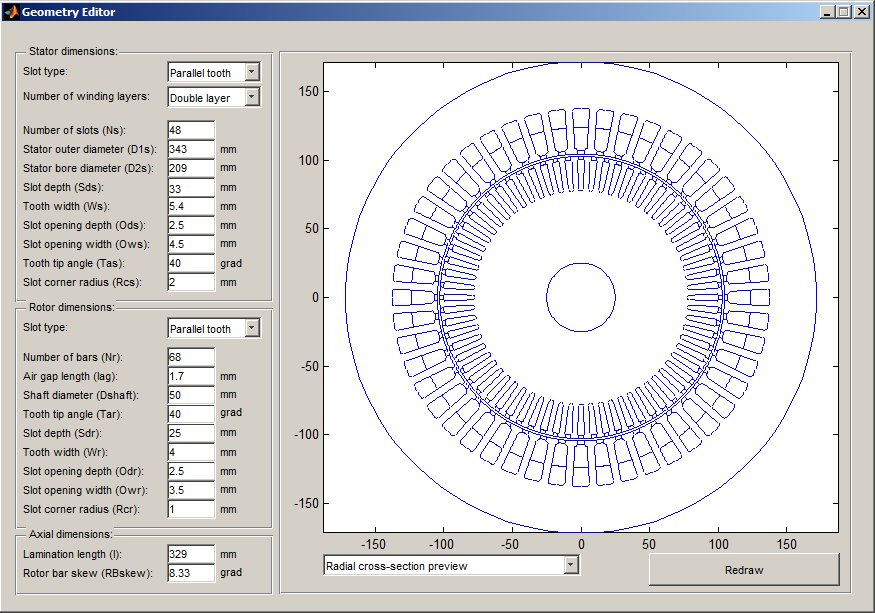

In [102]:
from IPython.display import Image
Image(filename='geometry.png')

Fig. 7 Designed IM geometry and associated parameters

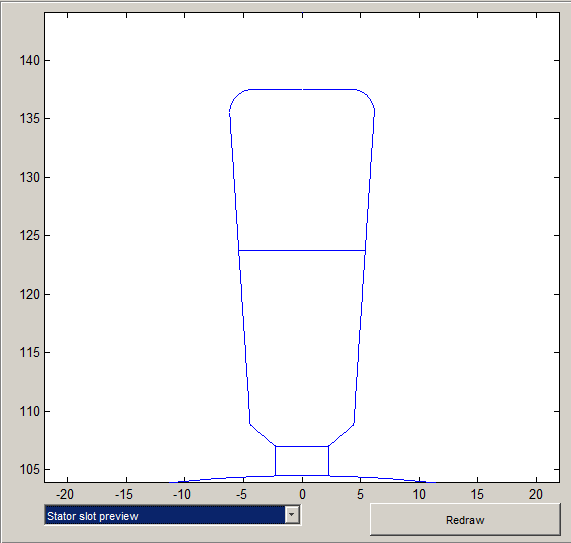

In [103]:
from IPython.display import Image
Image(filename='statorslot.png')

Fig. 8 Designed stator slot

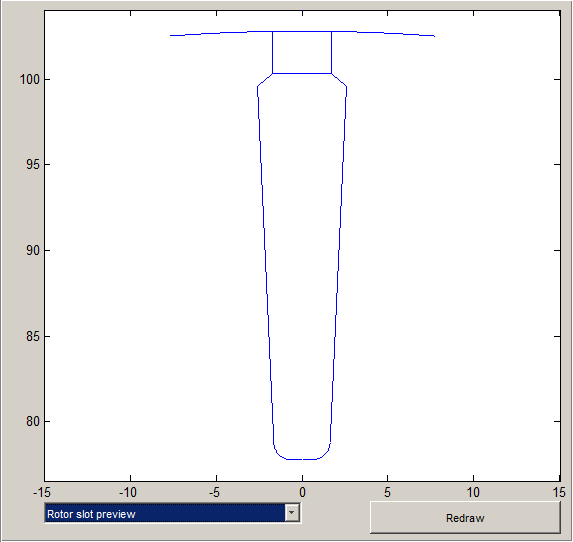

In [104]:
from IPython.display import Image
Image(filename='rotorslotview.png')

Fig. 9 Designed rotor slot stucture

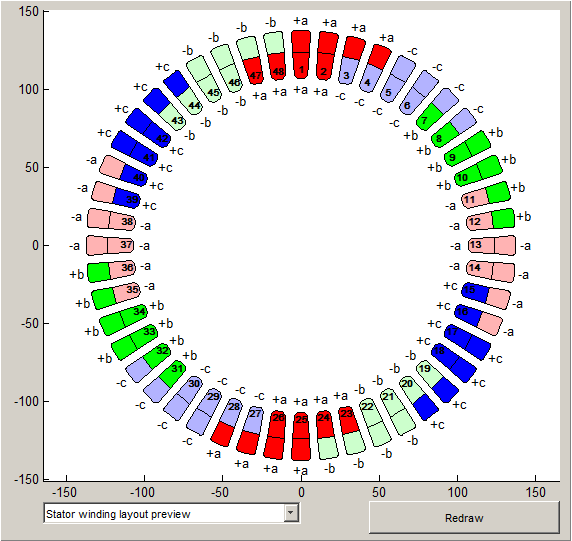

In [105]:
from IPython.display import Image
Image(filename='statorwinding.png')

Fig. 10 Winding configuration of 2 layer 5/6 pitch stator windings.

In fig. 11 the utilized B-H curve is provided. The curve data is taken from the induction machine design book [5].

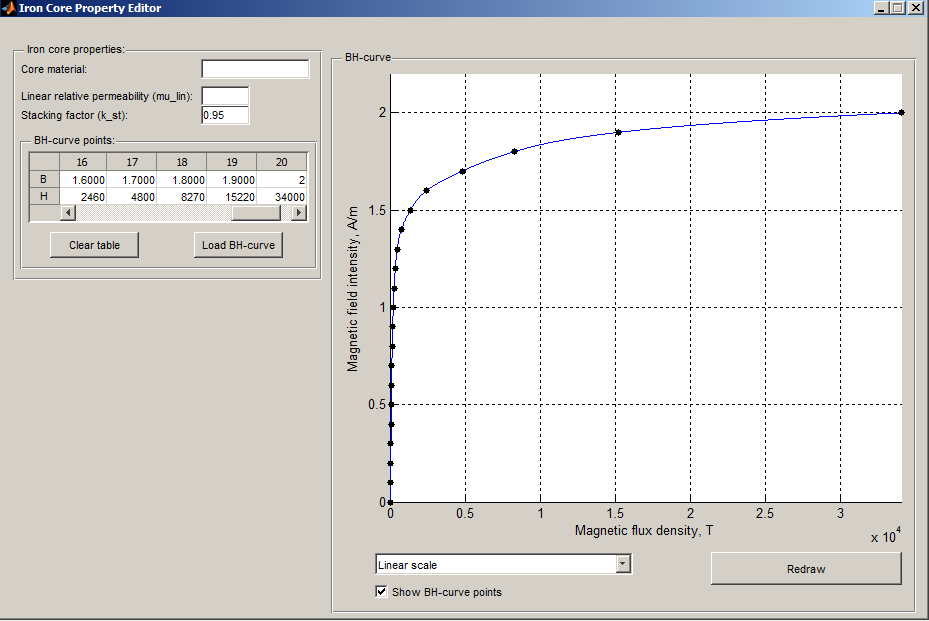

In [106]:
from IPython.display import Image
Image(filename='bhcurve.png')

Fig. 11 B-H curve taken from "The Induction Machine Design Handbook" book.

In fig. 12 the utilized mesh structure is illustrated.

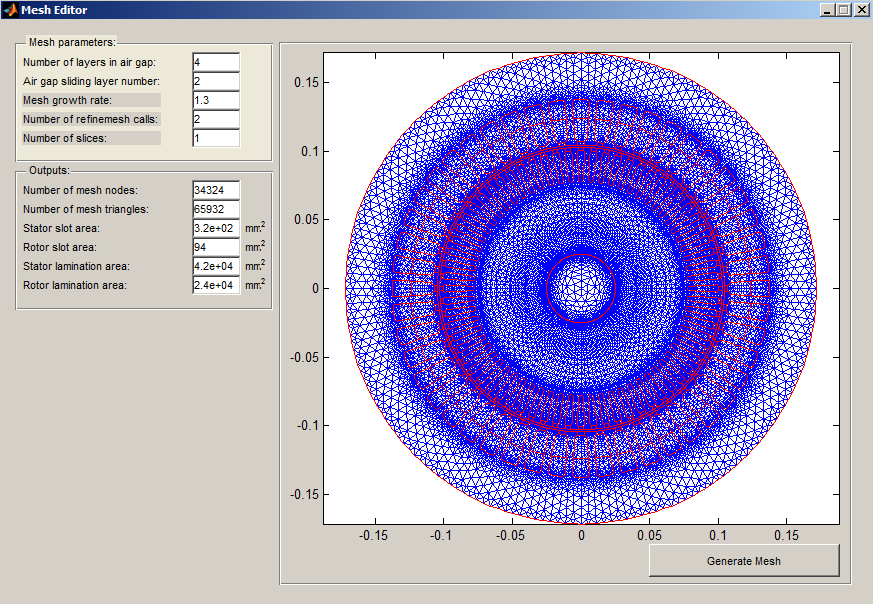

In [107]:
from IPython.display import Image
Image(filename='mesh.png')

Fig. 12 The mesh structure used in the simulations.

In Fig. 13, the magnetic field distribution is shown. From this figure, it can be interpreted that most of the regions are far from saturation which means the core is not used effectively.

Moreover, the current drawn from the supply is very low (Fig. 16) as it is the inrush current which is expected to be large in magnitude.

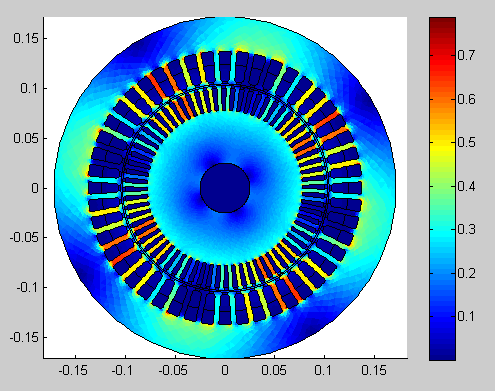

In [108]:
from IPython.display import Image
Image(filename='magneticfluxdensity1.png')

Fig. 13 The magnetic field density in the M/C.

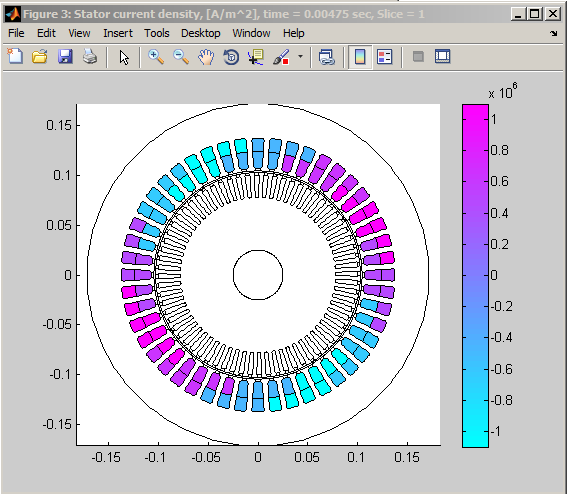

In [109]:
from IPython.display import Image
Image(filename='statorcurrentdensity.png')

Fig. 14 Current density in the stator coils (A/m2)

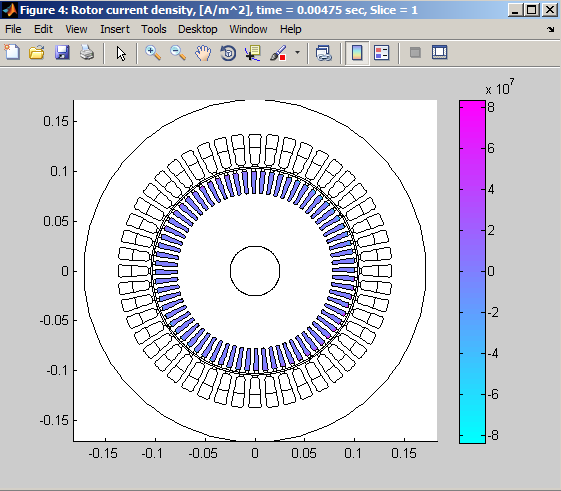

In [110]:
from IPython.display import Image
Image(filename='rotorcurrentdensity.png')

Fig. 15 Current Density in the rotor coils

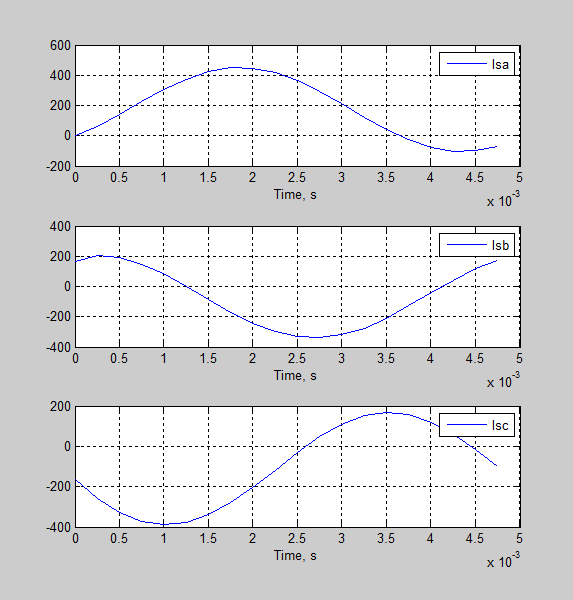

In [111]:
from IPython.display import Image
Image(filename='statorcurrents.png')

Fig. 16 Stator currents.

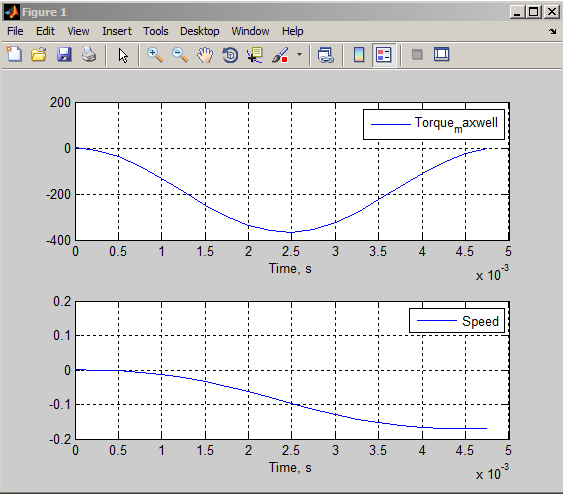

In [112]:
from IPython.display import Image
Image(filename='torquespeed.png')

Fig. 17 torque and speed characteristics.

###Single Layer design
The results shown above are not satisfactory enough so that an iteration is welcome. The iteration includes reducing the stator outer diameter slightly due to the fewness of the magnetic field in the back core in the previous simulation. The stator outer diameter is reduced from 343 mm to 330 mm. The other change is to use single layer stator windings. The use of single layer will improve the voltage utilization so that improved torque characteristics can be yielded. 

New total mass can be calculated as

In [113]:
Doutnew=0.33
density=7874  #kg/m3
totvol=math.pi*Doutnew*Doutnew*l/4
totmass=density*totvol
print totmass, 'kg'

222.072148663 kg


In [114]:
rotorvol=math.pi*Dis*Dis*l/4
rotormass=density*rotorvol
print rotormass, 'kg'

89.5232419615 kg


In [115]:
Jrotor=rotormass*Dis*Dis/2  #rotor inertia
print Jrotor

1.96505808352


New winding diagram is obtained as:

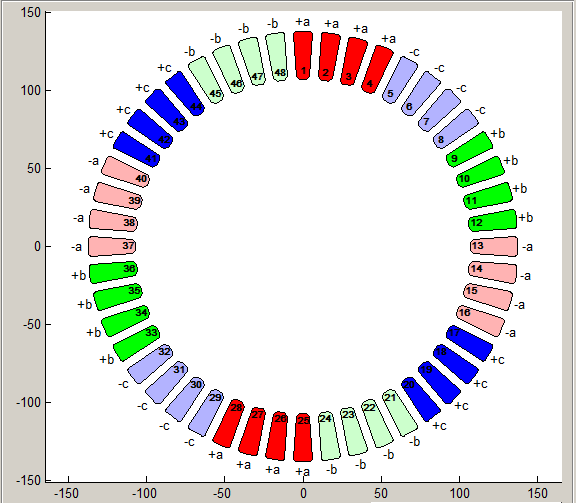

In [116]:
from IPython.display import Image
Image(filename='windingdiagram2.png')

Fig. 18 Stator winding diagram (single layer).

The following figure illustrates the magnetic field density distribution in T. It can be seen that, by reducing the outer diameter of the stator, magnetic filed density is increased in the back core without saturation. Moreover, single layer winding structure increases the magnetic flux density.

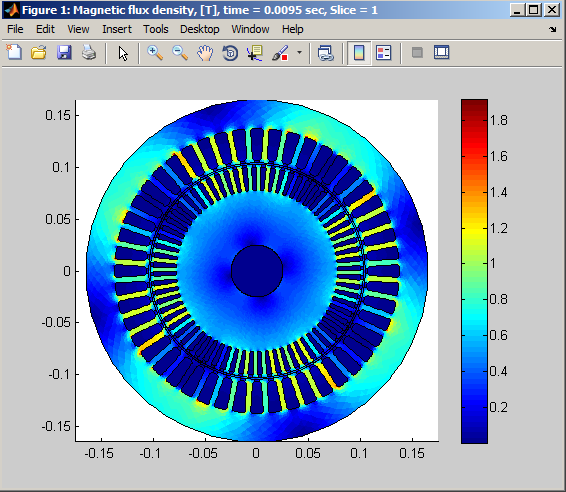

In [117]:
from IPython.display import Image
Image(filename='fluxdensity2.png')

Fig. 19 Magnetic field density (T) in the M/C.

In the following figures, the stator and rotor current densities are shown. From these figures, it can be concluded that, current density will not constitute a violated constraint. Moreover, it should be kept in mind that, the initial currents in the simulation do not belong to steady state values. Rather they are the transient values.

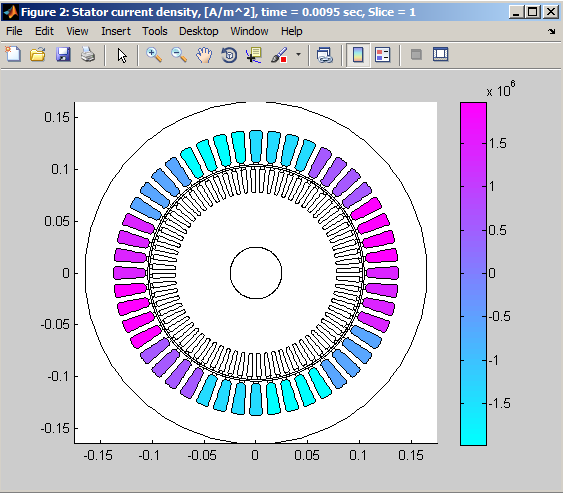

In [118]:
from IPython.display import Image
Image(filename='statorcurrentdensity2.png')

Fig. 20 Stator current density [A/m2]

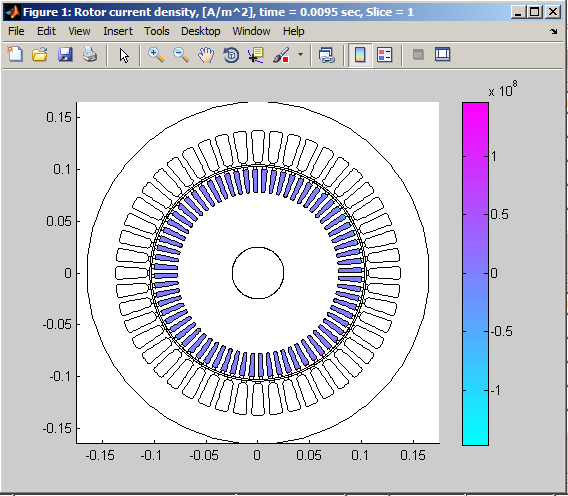

In [119]:
from IPython.display import Image
Image(filename='rotorcurrentdensity2.png')

Fig. 21 Rotor current density

Fig. 22 below illustrates the stator current currents. These curreents seem to be unbalanced and they have higher magnitudes that is calculated. This is because of the fact that these are the transient currents. An induction M/C can draw 5-7 times the rated current. However, as the simulation time will be long for the designed machine to reach steady state, these results are not gathered.

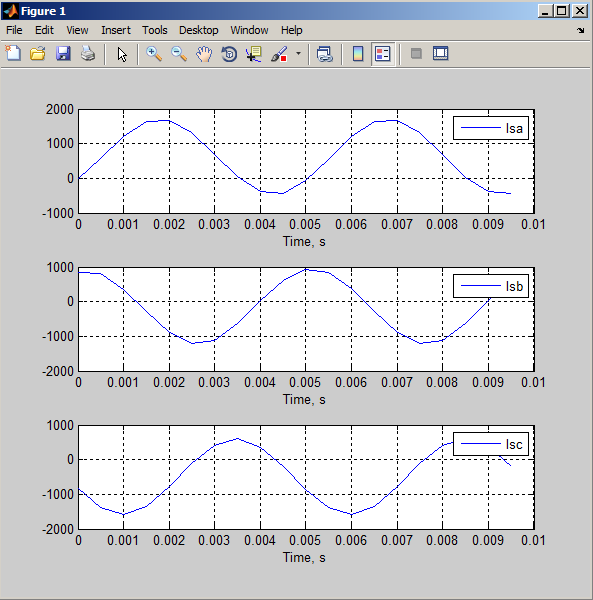

In [120]:
from IPython.display import Image
Image(filename='statorcurrents2.png')

Fig. 22 Stator currents [A]

As the magnetizing flux induces the rotor voltage hence rotor currents, these is no steady state average values in the rotor bar current.

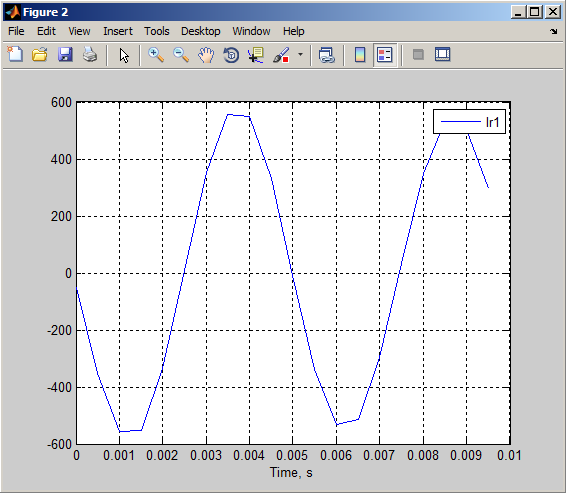

In [121]:
from IPython.display import Image
Image(filename='rotorcurrrent.png')

Fig. 23 Rotor bar currents [A].

###Conclusion

In this work, the parameters of the induction motor of Tesla model S electric car are extracted from the references. The missing parameters are calculated from standart procedure in [5]. Based on these parameters, simulations are made in motoranalysis software and associated results are provided. In the first design motor current and the torque did not seem to exhibit satisfactory performance hence the stator outer diameter is reduced and single layer coils are utilized. The simulation results belonging to single layer structure indicate improved torque characteristics and better utilization of the core. In the single layer design, the inverter can be controlled in a manner to reduce the harmonics which arose due to winding structure.

###References
[1]http://my.teslamotors.com/roadster/technology/motor

[2]https://www.youtube.com/watch?v=NaV7V07tEMQ

[3]http://sites.ieee.org/miami/files/2014/11/Hendershot-FIU-Lecture.pdf

[4] http://www.ens.dk/sites/ens.dk/files/klima-co2/transport/elbiler/IA-HEV_EVI/Konference_22_maj_2014/peter_bardenfleth-hansen_tesla_motors.pdf

[5]I. Boldea and S.A. Nasar, "The Induction Machine Handbook", CRC Press LLC, 2002.

[6] Juha Pyrhonen, Tapani Jokinen, Valeria Hrabovcova, 2009

[7] A. Tessarolo "Design Criteria for Stator Winding Coil Pitch Choice in AC
Inverter-Fed Multi-Phase Motors"

[8] https://www.advancedautobat.com/industry-reports/2014-Tesla-report/Extract-from-the-Tesla-battery-report.pdf